In [ ]:
from google.colab import drive
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [ ]:
!rm -rf /content/drive

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive



###1. Dataset Preparation

1.1 Load dataset: CIFAR-10 contains 10 classes (e.g., airplane, car, bird, cat, deer). The Cats and Dogs contains two classes (cats, dogs).

• Load the dataset using Keras.

• Resize al images to 224x224 pixels, and normalize pixel values to [0, 1].

• Split the data into training and testing sets. Further split the testing set into a testing and
validation subsets.

Set up data loading for each.

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Define dataset paths
original_dataset_path = '/content/drive/MyDrive/AS5/PetImages'
base_dir = '/content/drive/MyDrive/AS5'

# Clear and recreate train, test, and validation directories
for folder in ['train', 'test', 'validation']:
    folder_path = os.path.join(base_dir, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
    os.makedirs(os.path.join(folder_path, 'cats'), exist_ok=True)
    os.makedirs(os.path.join(folder_path, 'dogs'), exist_ok=True)

# Function to select a subset of 4,000 images
def select_subset(data_list, labels_list, limit=4000):
    indices = np.random.choice(len(data_list), limit, replace=False)
    return [data_list[i] for i in indices], [labels_list[i] for i in indices]

# Collect data paths
cats = [os.path.join(original_dataset_path, 'Cat', fname) for fname in os.listdir(os.path.join(original_dataset_path, 'Cat')) if fname.endswith(('jpg', 'jpeg', 'png'))]
dogs = [os.path.join(original_dataset_path, 'Dog', fname) for fname in os.listdir(os.path.join(original_dataset_path, 'Dog')) if fname.endswith(('jpg', 'jpeg', 'png'))]

# Balance classes: Select 2,000 images per class
limit_per_class = 4000 // 2  # 2,000 cats and 2,000 dogs
cats = np.random.choice(cats, size=limit_per_class, replace=False)
dogs = np.random.choice(dogs, size=limit_per_class, replace=False)

# Combine and shuffle the dataset
all_data = np.concatenate((cats, dogs))
all_labels = [0] * len(cats) + [1] * len(dogs)  # 0 for cats, 1 for dogs
all_data, all_labels = shuffle(all_data, all_labels, random_state=42)

# Split into train (70%), validation (15%), and test (15%)
x_train, x_temp, y_train, y_temp = train_test_split(all_data, all_labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Copy files into respective directories
def copy_files(file_list, label_list, target_dir):
    for filepath, label in zip(file_list, label_list):
        try:
            subfolder = 'cats' if label == 0 else 'dogs'
            dest_path = os.path.join(target_dir, subfolder, os.path.basename(filepath))
            shutil.copy(filepath, dest_path)
        except Exception as e:
            print(f"Error copying file {filepath}: {e}")

copy_files(x_train, y_train, os.path.join(base_dir, 'train'))
copy_files(x_val, y_val, os.path.join(base_dir, 'validation'))
copy_files(x_test, y_test, os.path.join(base_dir, 'test'))

print("Dataset successfully split into train (70%), validation (15%), and test (15%) sets.")


Dataset successfully split into train (70%), validation (15%), and test (15%) sets.


In [ ]:
import os

# Define paths
base_dir = '/content/drive/MyDrive/AS5'
splits = ['train', 'validation', 'test']

# Function to count images in each folder
def count_images(base_dir, split):
    cats_dir = os.path.join(base_dir, split, 'cats')
    dogs_dir = os.path.join(base_dir, split, 'dogs')

    num_cats = len([f for f in os.listdir(cats_dir) if f.endswith(('jpg', 'jpeg', 'png'))])
    num_dogs = len([f for f in os.listdir(dogs_dir) if f.endswith(('jpg', 'jpeg', 'png'))])

    print(f"{split.capitalize()} Folder:")
    print(f"  Cats: {num_cats} images")
    print(f"  Dogs: {num_dogs} images")
    print(f"  Total: {num_cats + num_dogs} images\n")

# Loop through train, validation, and test directories
for split in splits:
    count_images(base_dir, split)


Train Folder:
  Cats: 1384 images
  Dogs: 1416 images
  Total: 2800 images

Validation Folder:
  Cats: 301 images
  Dogs: 299 images
  Total: 600 images

Test Folder:
  Cats: 315 images
  Dogs: 285 images
  Total: 600 images



### 2. Standard Vision Transformer (ViT) Model

2.1 Implement the ViT Model:

• Load a pretrained Vision Transformer (ViT) model from Hugging Face using the TFViTModel class.

• Add a classification head after the VTi blocks, with 10 output units (one for each class ni CIFAR-10), or 1output unit for the Cats and Dogs problem).

• Compile the model with an appropriate optimizer, loss function, and metrics.

2.2 Training:

• Train the model on the training set.

• Save checkpoints periodically, and log training/validation loss and accuracy. .3 Evaluation:

• Evaluate the model on the test set, reporting accuracy and other relevant metrics.

• Plot the training and validation accuracy and loss over epochs.

Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


175/175 ━━━━━━━━━━━━━━━━━━━━ 1433s 8s/step - accuracy: 0.7138 - loss: 0.6338 - val_accuracy: 0.9267 - val_loss: 0.4934
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 48s 271ms/step - accuracy: 0.9325 - loss: 0.4644 - val_accuracy: 0.9850 - val_loss: 0.3680
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.9870 - loss: 0.3479 - val_accuracy: 0.9917 - val_loss: 0.2833
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 44s 246ms/step - accuracy: 0.9914 - loss: 0.2739 - val_accuracy: 0.9917 - val_loss: 0.2248
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.9945 - loss: 0.2133 - val_accuracy: 0.9917 - val_loss: 0.1832
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.9944 - loss: 0.1765 - val_accuracy: 0.9917 - val_loss: 0.1527
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 43s 245ms/step - accuracy: 0.9921 - loss: 0.1516 - val_accuracy: 0.9917 - val_loss: 0.1298
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 86s 269ms/step - accuracy: 0.9941 - loss: 0.1273 - val_

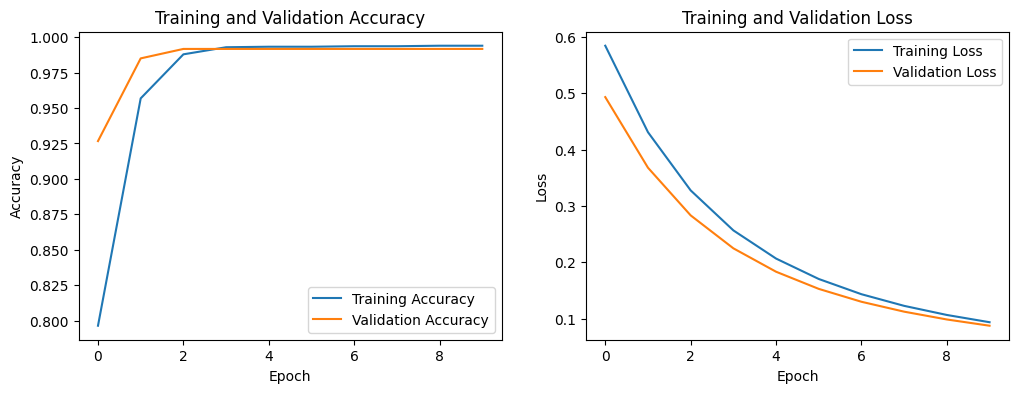

In [ ]:
# Step 1: Install necessary libraries
!pip install transformers tensorflow

# Step 2: Import libraries
from transformers import TFViTModel
from tensorflow.keras import layers, Model, optimizers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Data Generators
IMG_SIZE = 224
BATCH_SIZE = 16

# Load preprocessed data from Cell 1
train_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    '/content/drive/MyDrive/AS5/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    '/content/drive/MyDrive/AS5/validation',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    '/content/drive/MyDrive/AS5/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Step 4: Define the Vision Transformer Model
class ViTModelLayer(layers.Layer):
    def __init__(self, vit_model, **kwargs):
        super(ViTModelLayer, self).__init__(**kwargs)
        self.vit_model = vit_model

    def call(self, inputs):
        # Adjust dimensions to match ViT's expected input: (batch_size, 3, height, width)
        inputs = tf.transpose(inputs, [0, 3, 1, 2])
        vit_output = self.vit_model(pixel_values=inputs).last_hidden_state[:, 0]
        return vit_output

def create_vit_model():
    # Load pretrained Vision Transformer model
    vit_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
    input_layer = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    vit_output = ViTModelLayer(vit_model)(input_layer)
    output_layer = layers.Dense(1, activation='sigmoid')(vit_output)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Step 5: Instantiate and Compile the ViT Model
vit_model = create_vit_model()
vit_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the Vision Transformer Model
EPOCHS = 10

history = vit_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# Step 7: Evaluate the Model on the Test Data
test_loss, test_accuracy = vit_model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

# Step 8: Plot Training and Validation Metrics
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
